In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

from src.utils import read_series
from src.describe import *

plt.style.use('ggplot')


stocks_path = "data/01_clean/stocks.csv"
data = read_series(stocks_path)

tickers = ['PETR4.SA', 'ITUB4.SA', 'VALE3.SA', 'BBAS3.SA', 'ABEV3.SA', 'BBDC4.SA']

outliers_tickers = ['CIEL3.SA', 'CMIG4.SA', 'CYRE3.SA', 'EQTL3.SA', 'LREN3.SA', 'PRIO3.SA','SUZB3.SA', 'UGPA3.SA']
tickers = outliers_tickers


In [2]:
data.head()

,ABEV3.SA_open,ABEV3.SA_high,ABEV3.SA_low,ABEV3.SA_close,ABEV3.SA_volume,ABEV3.SA_dividends_x,ABEV3.SA_stock splits,ABEV3.SA_dividends_y,B3SA3.SA_open,B3SA3.SA_high,...,WEGE3.SA_stock splits,WEGE3.SA_dividends_y,YDUQ3.SA_open,YDUQ3.SA_high,YDUQ3.SA_low,YDUQ3.SA_close,YDUQ3.SA_volume,YDUQ3.SA_dividends_x,YDUQ3.SA_stock splits,YDUQ3.SA_dividends_y
date,,,,,,,,,,,,,,,,,,,,,
2005-01-03,2.566492,2.566492,2.566492,2.566492,40040.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-01-04,2.584958,2.584958,2.584958,2.584958,72498.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-01-05,2.572049,2.572049,2.572049,2.572049,20323.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-01-06,2.584958,2.584958,2.584958,2.584958,31092.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005-01-07,2.586823,2.586823,2.586823,2.586823,45501.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
data.describe()

,ABEV3.SA_open,ABEV3.SA_high,ABEV3.SA_low,ABEV3.SA_close,ABEV3.SA_volume,ABEV3.SA_dividends_x,ABEV3.SA_stock splits,ABEV3.SA_dividends_y,B3SA3.SA_open,B3SA3.SA_high,...,WEGE3.SA_stock splits,WEGE3.SA_dividends_y,YDUQ3.SA_open,YDUQ3.SA_high,YDUQ3.SA_low,YDUQ3.SA_close,YDUQ3.SA_volume,YDUQ3.SA_dividends_x,YDUQ3.SA_stock splits,YDUQ3.SA_dividends_y
count,7225.000000,7225.000000,7225.000000,7225.000000,7.225000e+03,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000,...,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000,7225.000000,7.225000e+03,7225.000000,7225.000000,7225.000000
mean,9.408895,9.514803,9.302888,9.412005,1.140512e+07,0.001586,0.002249,0.012541,6.490911,6.602477,...,0.000913,0.005628,12.616193,12.876555,12.337656,12.604909,2.196141e+06,0.001747,0.000507,0.010405
std,5.202945,5.262603,5.145336,5.201452,1.388595e+07,0.023601,0.095072,0.071071,5.053658,5.144176,...,0.039680,0.021968,10.449254,10.668401,10.221321,10.443584,3.345546e+06,0.030297,0.035630,0.078335
min,1.107839,1.107839,1.107839,1.107839,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,3.370699,3.394248,3.335710,3.381767,7.000640e+05,0.000000,0.000000,0.000000,2.473676,2.512392,...,0.000000,0.000000,4.529885,4.609861,4.448812,4.518248,1.182000e+05,0.000000,0.000000,0.000000
50%,11.168962,11.291486,11.040244,11.170962,8.370100e+06,0.000000,0.000000,0.000000,5.590997,5.677246,...,0.000000,0.000000,11.492960,11.730713,11.210000,11.507435,1.680200e+06,0.000000,0.000000,0.000000
75%,13.813385,13.965702,13.667792,13.802263,1.820283e+07,0.000000,0.000000,0.000000,10.919760,11.142680,...,0.000000,0.000000,20.070875,20.456121,19.647542,20.032097,3.168233e+06,0.000000,0.000000,0.000000
max,19.450503,19.586075,19.163412,19.354809,2.876952e+08,0.960000,5.000000,0.960000,21.105850,21.708869,...,2.000000,0.297943,53.090154,53.620497,51.331645,52.662155,1.270750e+08,1.332831,3.000000,1.332831


## Análise Descritiva

Plotando as séries temporais

Este bloco de código plota as séries temporais do preço de fechamento das ações para cada ativo na lista `tickers`. 

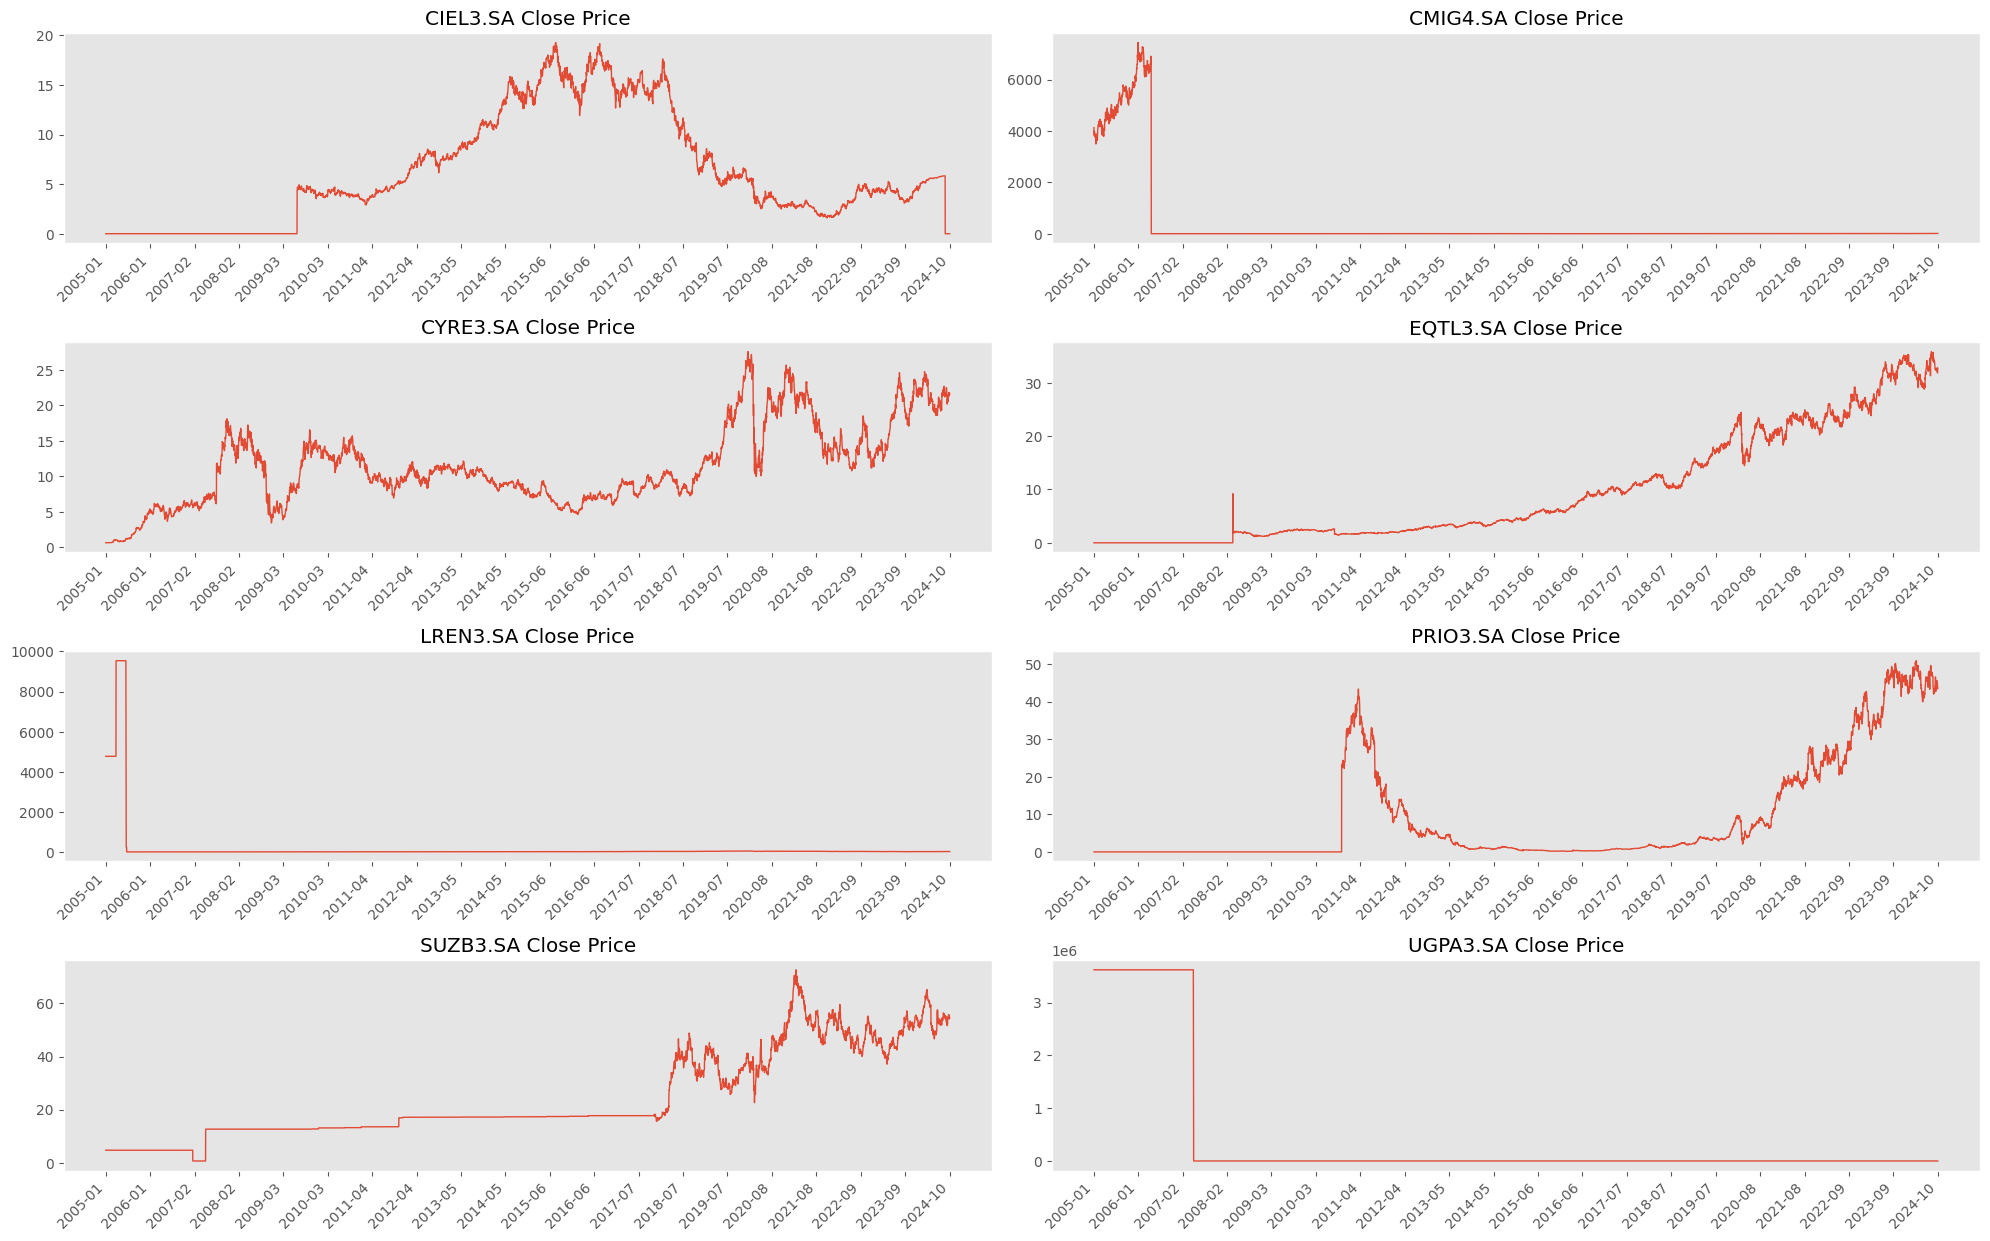

In [4]:
n_ticks = 20
x_dates = np.linspace(0, len(data.index) - 1, n_ticks, dtype=int)
x_ticks = data.index[x_dates]


plt.figure(figsize = (20, 15))
for i, stock in enumerate(tickers, start=1):
    plt.subplot(5, 2, i)
    plt.plot(data.index, data[f'{stock}_close'], linewidth = 1)
    plt.xticks(x_ticks, x_ticks.strftime('%Y-%m'), rotation=45, ha='right')
    plt.title(f'{stock} Close Price')
    plt.grid()
plt.tight_layout()
plt.show()

Plotando o volume de ações negociadas

Este bloco de código plota o volume de ações negociadas para cada ativo.

- `stock_volume()`: Calcula o volume de ações para cada ativo da lista `tickers`.


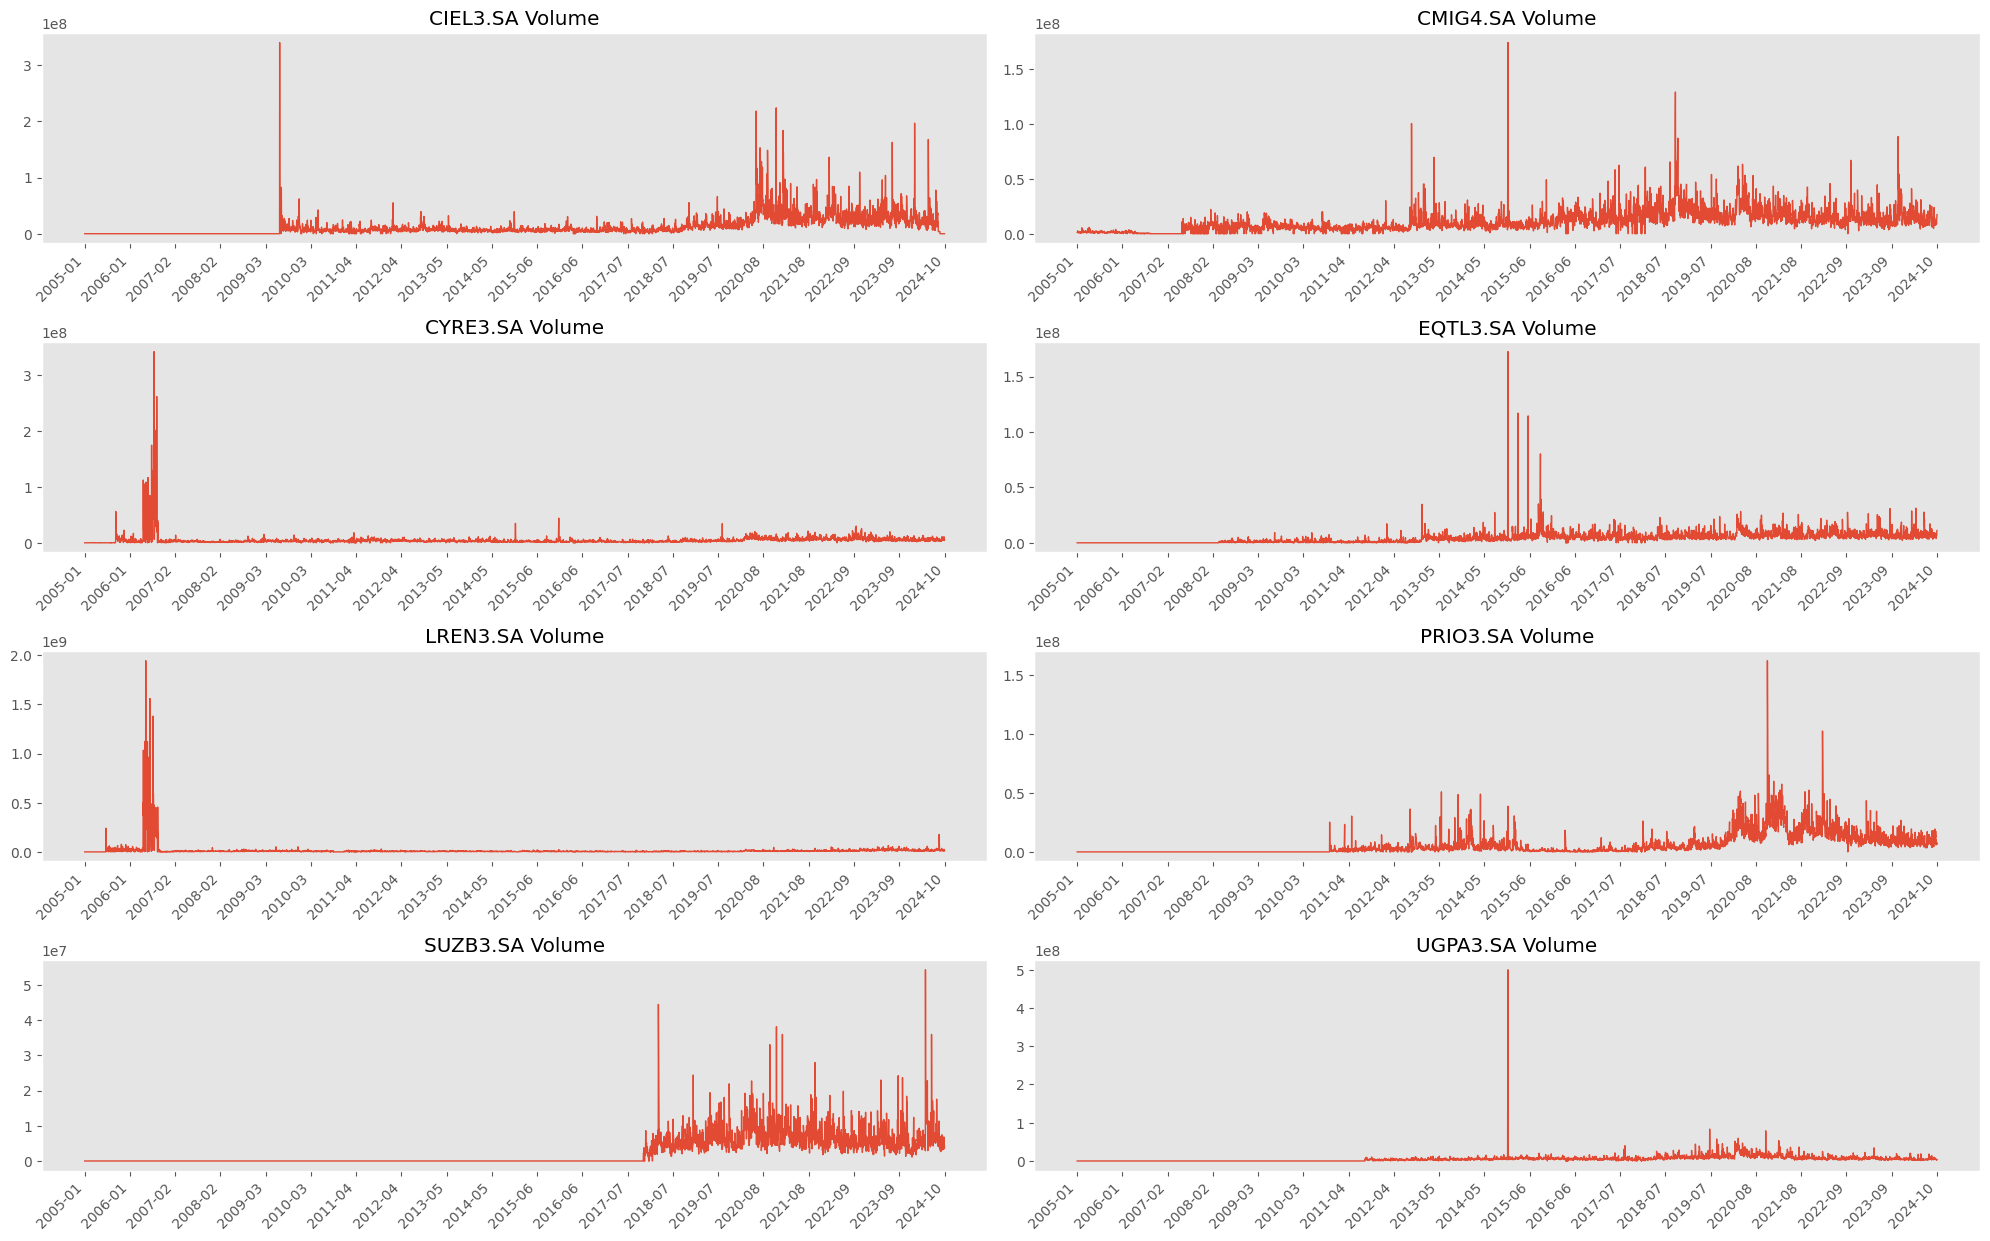

In [5]:


plt.figure(figsize = (20, 15))
for i,stock in enumerate(tickers, 1):
    plt.subplot(5, 2, i)
    plt.plot(data.index, stock_volume(data, stock), linewidth = 1)
    plt.xticks(x_ticks, x_ticks.strftime('%Y-%m'), rotation=45, ha='right')
    plt.title(f'{stock} Volume')
    plt.grid()
plt.tight_layout()
plt.show()


Plotando diferentes números de dias de média móvel

Aqui são plotados os preços de fechamento das ações juntamente com médias móveis de 5, 10, 20 e 50 dias.

- `moving_average()`: Calcula as médias móveis para diferentes períodos.



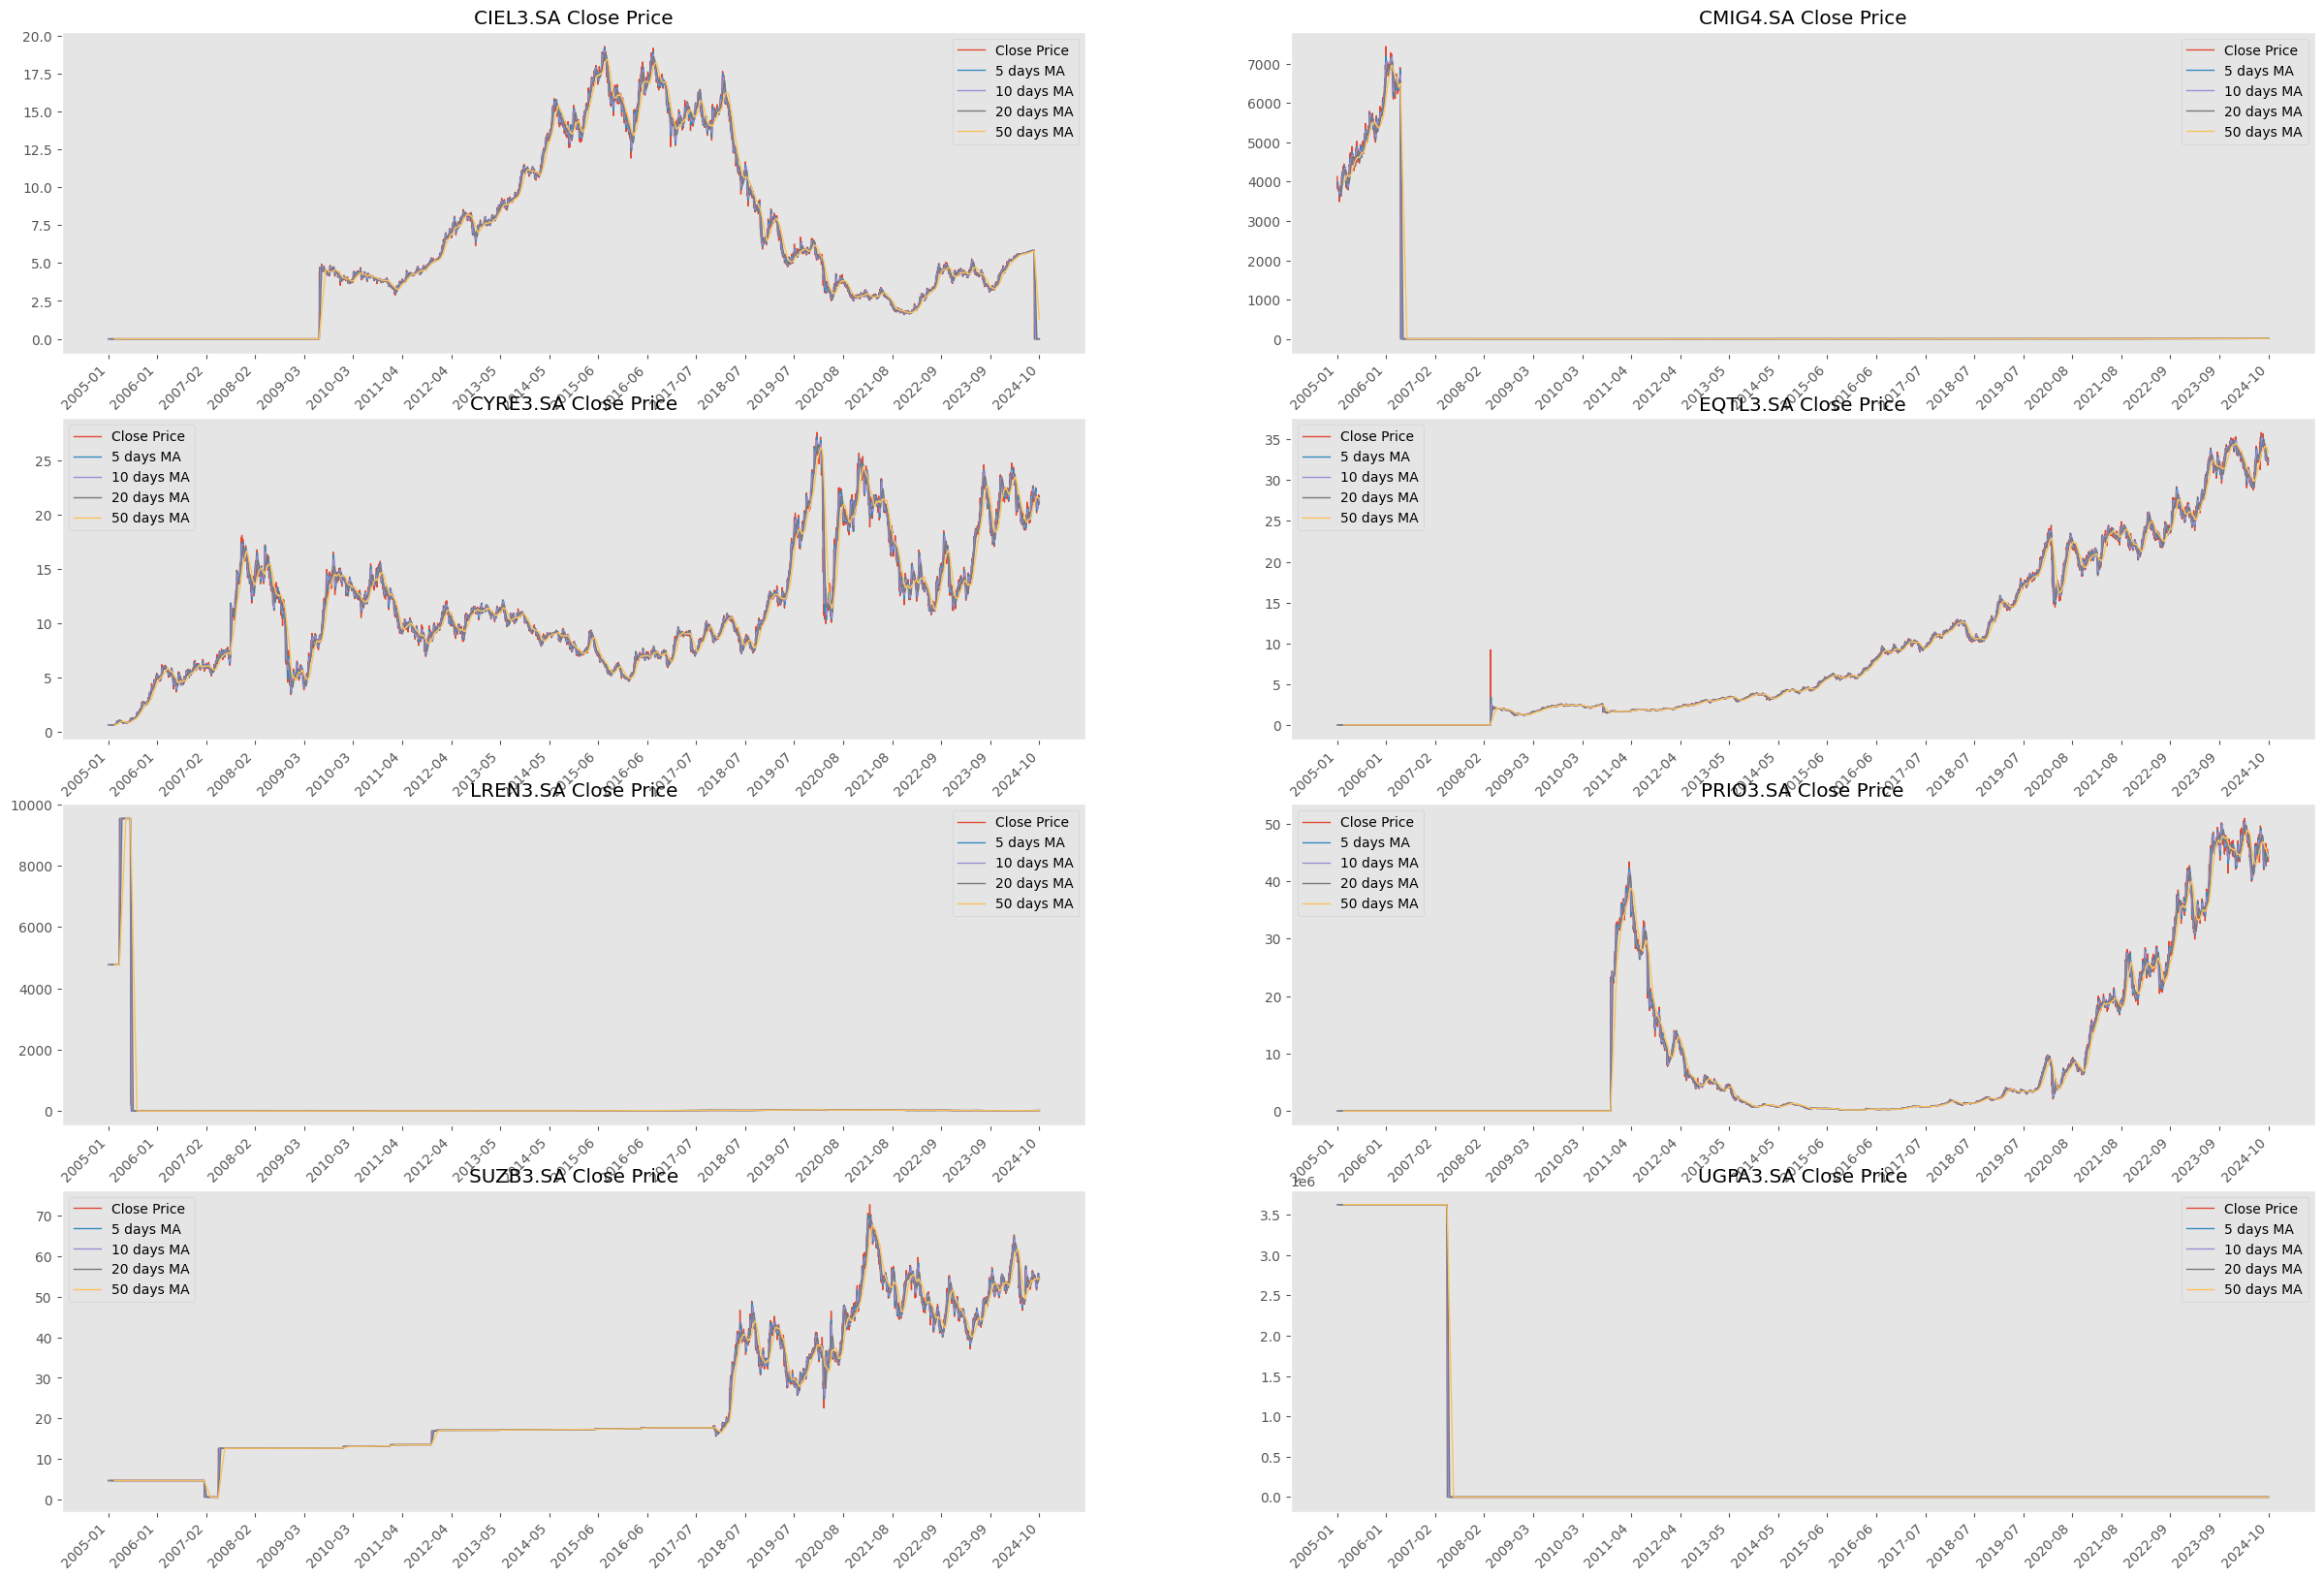

In [6]:
plt.figure(figsize = (30, 25))
for i, stock in enumerate(tickers, start=1):
    plt.subplot(5, 2, i)
    plt.plot(data.index, data[f'{stock}_close'], linewidth = 1, label = 'Close Price')
    for n_days in [5, 10, 20, 50]:
        plt.plot(data.index, moving_average(data, stock, n_days), label = f'{n_days} days MA', linewidth = 1)
    plt.xticks(x_ticks, x_ticks.strftime('%Y-%m'), rotation=45, ha='right')
    plt.title(f'{stock} Close Price')
    plt.legend()
    plt.grid()

Verificando possíveis tendências fazendo downsampling

Neste bloco, os dados são reamostrados para frequência mensal para identificar tendências de longo prazo.

- `pd.to_datetime()`: Converte a coluna de datas para o formato datetime.
- `resample()`: Faz o downsampling dos dados para frequência mensal.
- `plt.plot()`: Plota os preços de fechamento mensais.


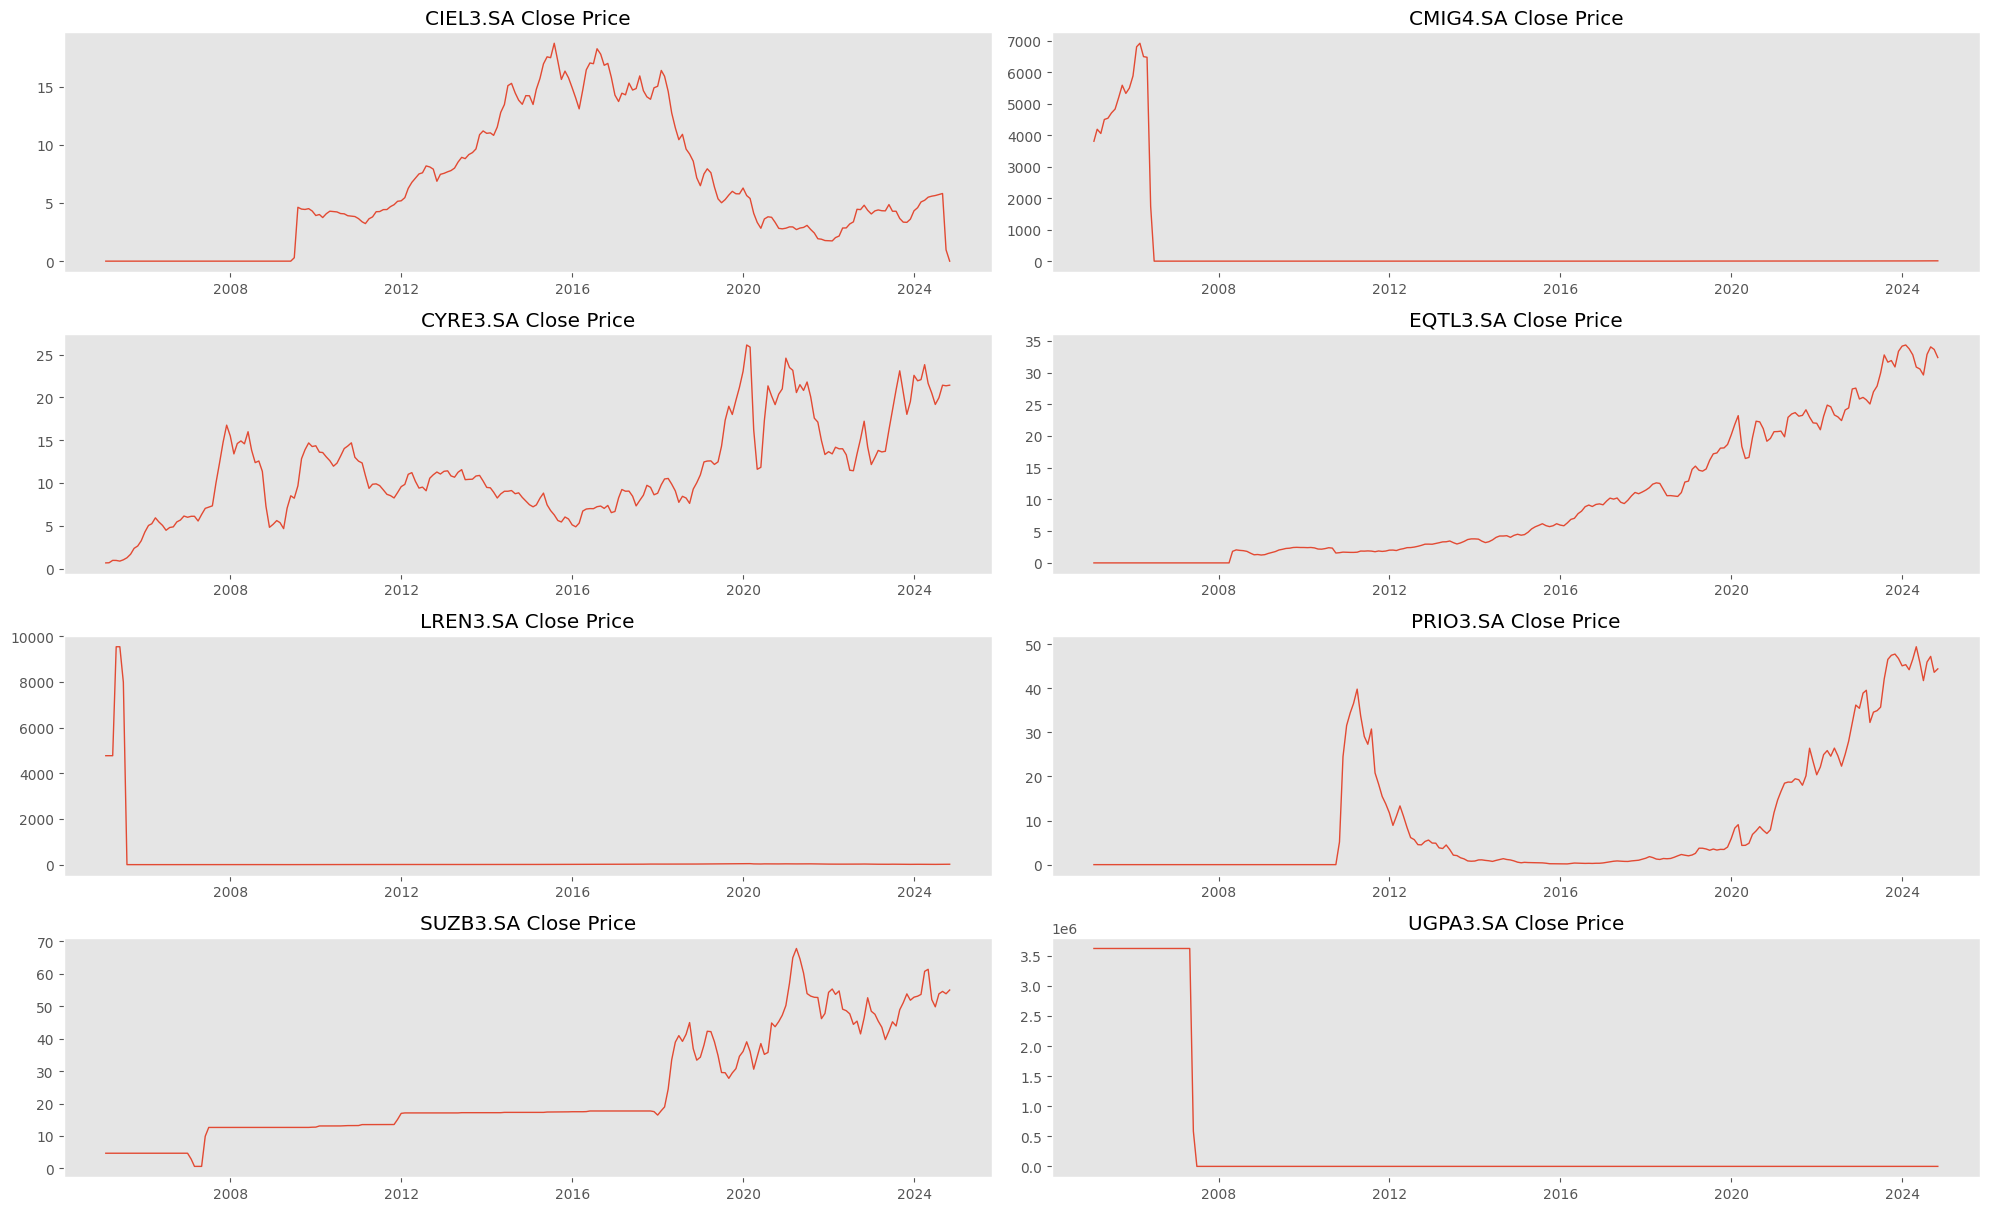

In [7]:
data_monthly = data.resample('ME').mean()

plt.figure(figsize = (20, 15))
for i, stock in enumerate(tickers, start=1):
    plt.subplot(5, 2, i)
    plt.plot(data_monthly.index, data_monthly[f'{stock}_close'], linewidth = 1)
    plt.title(f'{stock} Close Price')
    plt.grid()
plt.tight_layout()
plt.show()

Extraindo a sazonalidade das séries temporais

Este bloco utiliza `seasonal_decompose()` para decompor as séries temporais em componentes de tendência, sazonalidade e resíduo.

- `seasonal_decompose()`: Decompõe as séries temporais.
- `result.plot()`: Plota cada componente da decomposição.

<Figure size 3000x2000 with 0 Axes>

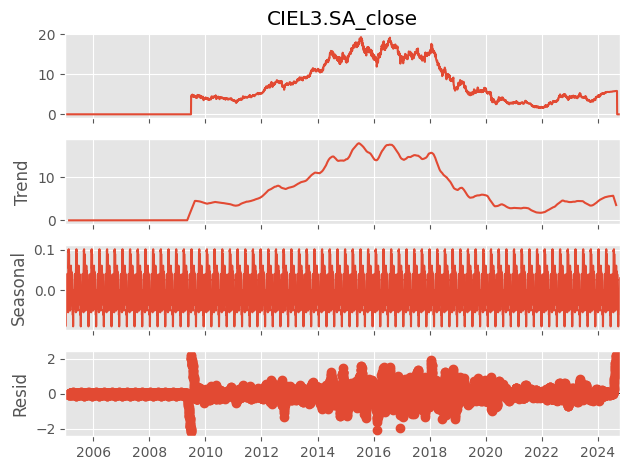

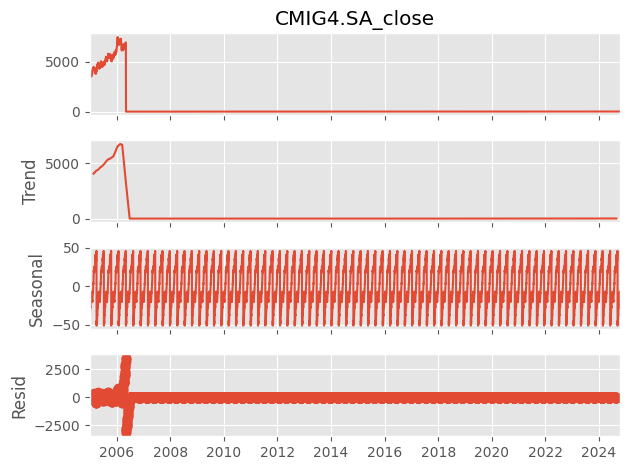

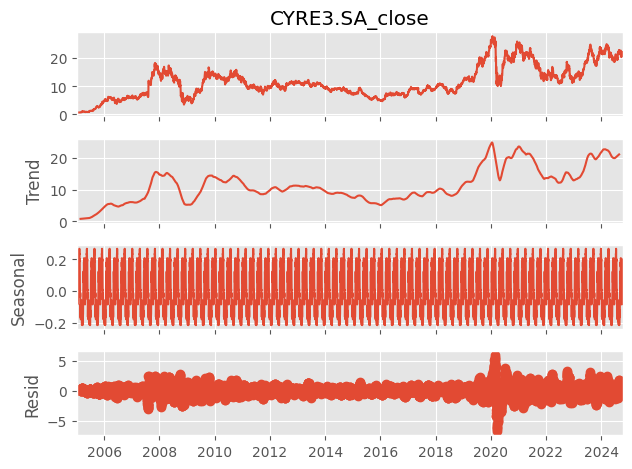

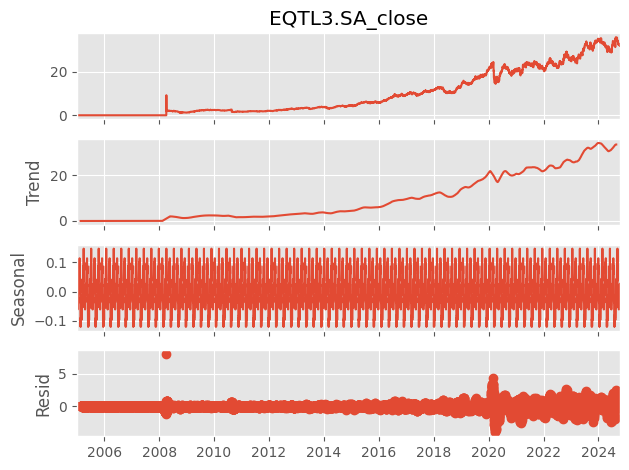

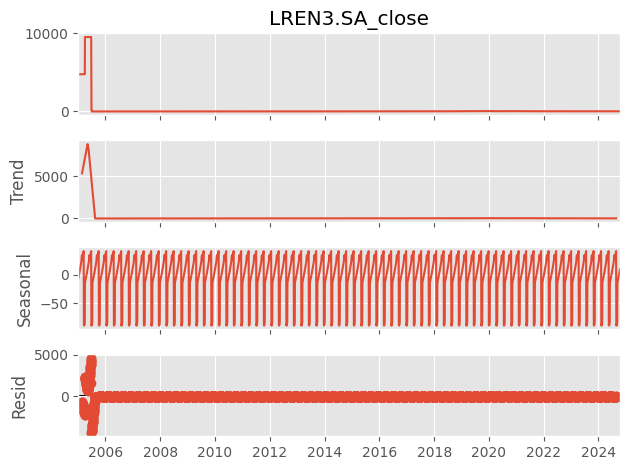

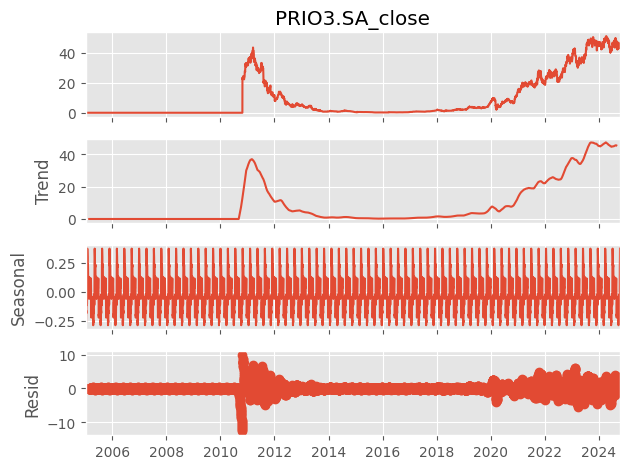

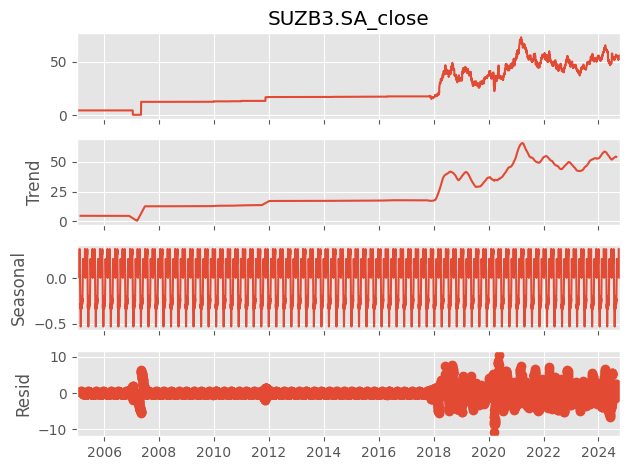

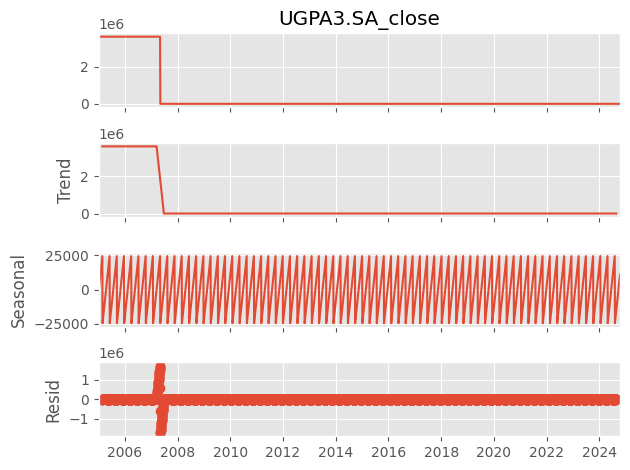

In [8]:
plt.figure(figsize = (30, 20))
for i, stock in enumerate(tickers, 1):
    data[f'{stock}_close'] = data[f'{stock}_close'].astype(float)
    result = seasonal_decompose(data[f'{stock}_close'], model='additive', period=100)
    result.plot()